In [29]:
#Impprt librarys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Reading Data
netf = pd.read_csv("netflix1.csv")
netf.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [31]:
#drop duplicate Rows
netf.drop_duplicates(inplace=True)

In [32]:
#dataset information
netf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [33]:
#change type to datetime
netf["date_added"] = pd.to_datetime(netf["date_added"] , format = "%m/%d/%Y")

In [34]:
# Extract numerical duration and its unit (e.g., minutes, seasons) from the 'duration' column and split them into two separate columns: 'duration' and 'duration-unit'
netf[['duration', 'duration-unit']] = netf['duration'].str.extract(r'(\d+)\s*(\w+)')

In [35]:
# Standardize the values in the 'duration-unit' column by replacing "Seasons" with "Season" for consistency
netf["duration-unit"] = netf["duration-unit"].replace("Seasons" , "Season")

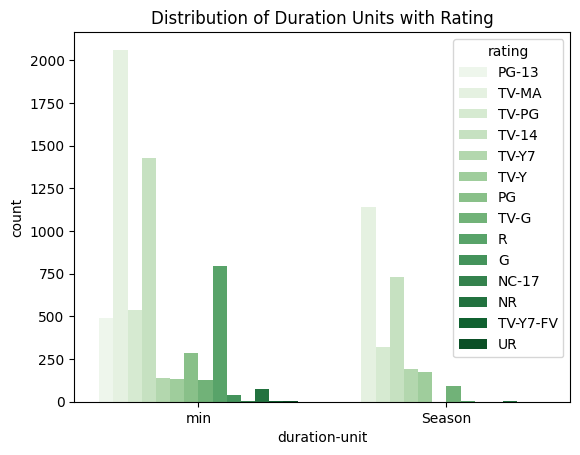

In [36]:
# Plot the distribution of 'duration-unit' (e.g., minutes, seasons) categorized by 'rating' using a count plot
# This visualizes how different duration units are distributed across various content ratings
sns.countplot(x="duration-unit", data=netf, hue="rating", palette="Greens")
plt.title("Distribution of Duration Units with Rating")
plt.show()

In [37]:
# Calculate and display the percentage of Movies (in minutes) and Series (in seasons) 
# based on the 'duration-unit' column, ensuring proper handling of missing values.
counts = netf["duration-unit"].value_counts()
print(f"Percentage of Movies: {counts.get('min', 0) / counts.sum() * 100:.2f}%")
print(f"Percentage of Series: {counts.get('Season', 0) / counts.sum() * 100:.2f}%")

Percentage of Movies: 69.69%
Percentage of Series: 30.31%


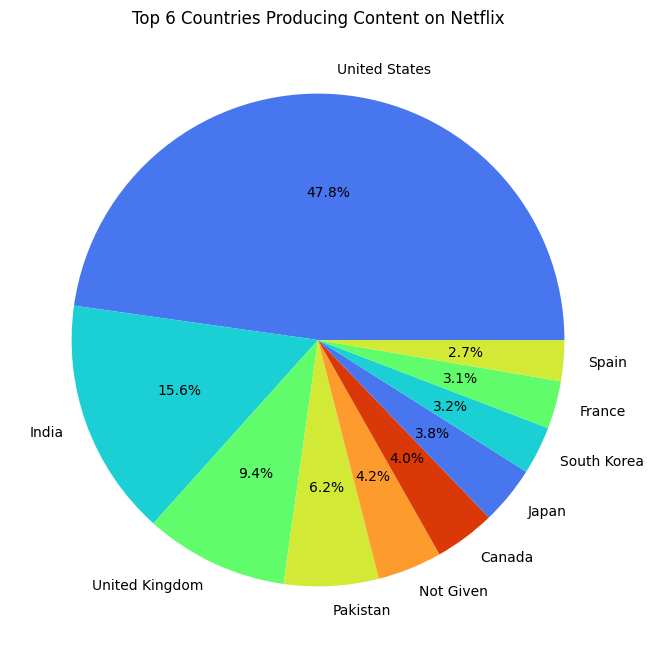

In [38]:
# Count the occurrences of each country in the 'country' column
country_counts = netf['country'].value_counts()
# Select the top 6 countries
top_countries = country_counts[:10]
# Plot a pie chart for the top 6 countries
plt.figure(figsize=(8,8))
plt.pie(top_countries, labels=top_countries.index, autopct="%.1f%%", colors=sns.color_palette("turbo"))
plt.title("Top 6 Countries Producing Content on Netflix")
plt.show()

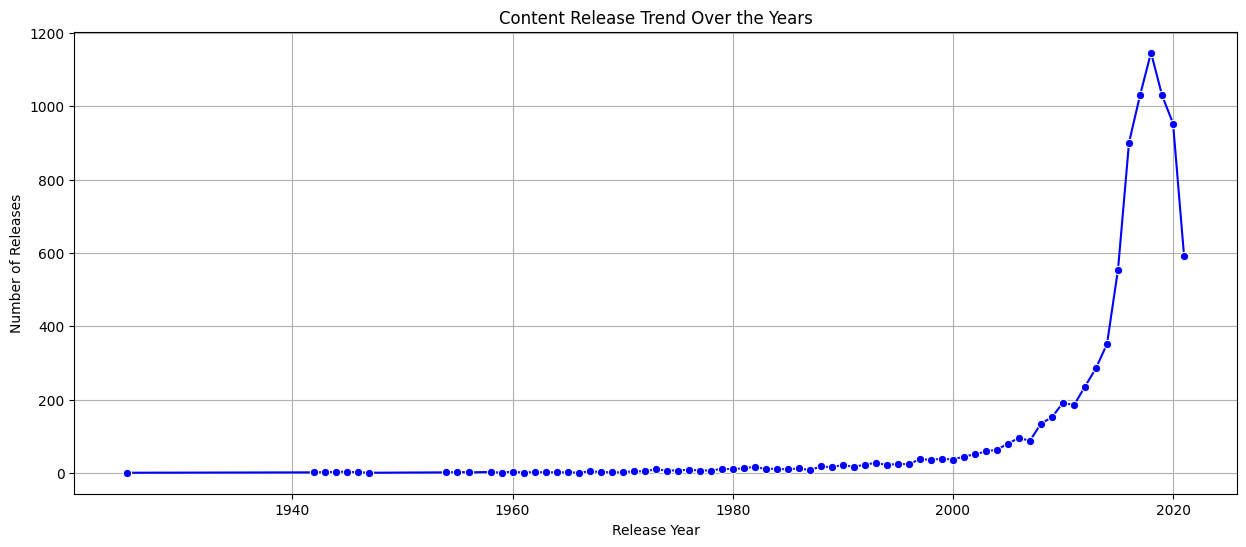

In [39]:
# Plot a line chart showing the trend of content releases over the years
# The x-axis represents the release years, and the y-axis represents the number of releases
# A line plot with markers is used to visualize the trend, and a grid is added for better readability
plt.figure(figsize=(15, 6))
year_data = netf["release_year"].value_counts().sort_index()
sns.lineplot(x=year_data.index, y=year_data.values, marker='o', color='blue')
plt.title("Content Release Trend Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Releases")
plt.grid(True)

<Axes: xlabel='rating'>

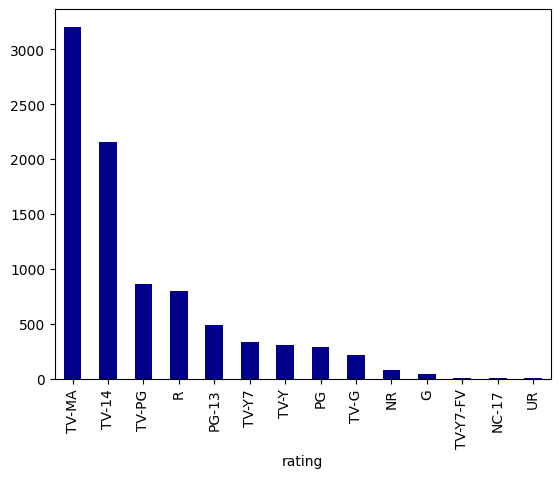

In [40]:
# Plot a bar chart showing the count of each rating category in the dataset, using a dark blue color for the bars
netf["rating"].value_counts().plot(kind="bar" , color = "darkblue")

In [41]:
#Save the file
netf.to_csv("Netflix.csv")

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'duration-unit'],
      dtype='object')